# Crimes Data in Israel (2019-2024)

#### by: Eden Shmuel, Oriana Feltzer

***

Import Required Libraries

In [1]:
#!pip install seaborn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler

Define Paths to Crime Datasets (2019–2024)

In [5]:
!git clone https://github.com/orifelszer/CrimeData.git

import os
import zipfile

zip_folder = 'CrimeData'

zip_files = [f for f in os.listdir(zip_folder) if f.endswith('.zip')]

for zip_file in zip_files:
    zip_path = os.path.join(zip_folder, zip_file)
    extract_path = os.path.join(zip_folder, zip_file.replace('.zip', ''))

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"Extracted: {zip_file} -> {extract_path}")

import pandas as pd

dataframes = {}

for zip_file in zip_files:
    folder_name = zip_file.replace('.zip', '')
    csv_path = os.path.join(zip_folder, folder_name, f"{folder_name}.csv")

    if os.path.exists(csv_path):
        df_name = f"Crimes_{folder_name[-4:]}"
        dataframes[df_name] = pd.read_csv(csv_path)
        print(f"Loaded {df_name} with {dataframes[df_name].shape[0]} rows.")
    else:
        print(f"CSV file not found in {folder_name}!")

Cloning into 'CrimeData'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 37 (delta 12), reused 13 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (37/37), 96.87 MiB | 25.86 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Extracted: crimes2020.zip -> CrimeData/crimes2020
Extracted: crimes2021.zip -> CrimeData/crimes2021
Extracted: crimes2023.zip -> CrimeData/crimes2023
Extracted: crimes2022.zip -> CrimeData/crimes2022
Extracted: crimes2019.zip -> CrimeData/crimes2019
Extracted: crimes2024.zip -> CrimeData/crimes2024
Loaded Crimes_2020 with 391994 rows.
Loaded Crimes_2021 with 416096 rows.
Loaded Crimes_2023 with 418421 rows.
Loaded Crimes_2022 with 415022 rows.
Loaded Crimes_2019 with 407461 rows.
CSV file not found in crimes2024!
                    FictiveIDNumber  Year Quarter  YeshuvKod    Yeshuv  \
0  9DF96CE4D6AB4649CECEAEFBAF3AF07C  2019      Q3     8400.0    רחובות

Load Crime Data into Pandas DataFrames

Preview 2019 Crime Data

In [8]:
dataframes['Crimes_2019'].head()

,FictiveIDNumber,Year,Quarter,YeshuvKod,Yeshuv,PoliceDistrictKod,PoliceDistrict,PoliceMerhavKod,PoliceMerhav,PoliceStationKod,PoliceStation,municipalKod,municipalName,StatisticAreaKod,StatisticArea,StatisticGroupKod,StatisticGroup,StatisticTypeKod,StatisticType
0,9DF96CE4D6AB4649CECEAEFBAF3AF07C,2019,Q3,8400.0,רחובות,40000000,מחוז מרכז,41200000,מרחב שפלה,41212000,תחנת רחובות שפלה,NaN,NaN,84000222.0,אושיות,700,עבירות כלפי הרכוש,715,גניבות אחרות
1,BA008B3B18529E6E4C831139FDA8B172,2019,Q4,510.0,כפר מנדא,10000000,מחוז צפון,15002736,מרחב גליל צפון,12401000,תחנת משגב גליל צפון,NaN,NaN,NaN,NaN,600,עבירות כלפי המוסר,608,שמוש בסמים מסוכנים
2,1905BE9ECCA0AEDA4C4D13705F7A5672,2019,Q3,7000.0,לוד,40000000,מחוז מרכז,41200000,מרחב שפלה,41213000,תחנת לוד שפלה,NaN,NaN,70000022.0,גבעת הזיתים,700,עבירות כלפי הרכוש,712,גניבה מתוך רכב
3,5843D35EBA3C57AADF22435516ACD203,2019,Q3,8400.0,רחובות,40000000,מחוז מרכז,41200000,מרחב שפלה,41212000,תחנת רחובות שפלה,NaN,NaN,84000116.0,החלוץ/ העבודה,200,עבירות סדר ציבורי,220,עבירות על חוק הכניסה לישראל
4,BFF2C9D05A0250AFB2A4CB985FF2FA62,2019,Q1,6900.0,כפר סבא,40000000,מחוז מרכז,41100000,מרחב שרון,41112000,תחנת כפר סבא שרון,NaN,NaN,NaN,NaN,700,עבירות כלפי הרכוש,723,גניבת חלקי רכב


In [42]:
combined_data = pd.concat(dataframes, axis=0, ignore_index=True)
combined_data

,FictiveIDNumber,Year,Quarter,YeshuvKod,Yeshuv,PoliceDistrictKod,PoliceDistrict,PoliceMerhavKod,PoliceMerhav,PoliceStationKod,PoliceStation,municipalKod,municipalName,StatisticAreaKod,StatisticArea,StatisticGroupKod,StatisticGroup,StatisticTypeKod,StatisticType
0,2D86C670E53C50AD41A64EAD968EF460,2020,Q1,7400.0,נתניה,40000000,מחוז מרכז,41100000,מרחב שרון,41110000,תחנת נתניה שרון,NaN,NaN,74000331.0,רחובות הר ציון ברודצקי(צפון) הגליל(צפון),200,עבירות סדר ציבורי,206,איומים
1,864EE6F3CB42438AAFC01CDE8E2BC233,2020,Q2,8300.0,ראשון לציון,40000000,מחוז מרכז,41200000,מרחב שפלה,41210000,תחנת ראשון לציון שפלה,NaN,NaN,83000315.0,מרכז העיר (2),600,עבירות כלפי המוסר,609,סחריבוא ויצוא סמים
2,2121ECE4B784C829D89D17052D70DC36,2020,Q4,6400.0,הרצליה,20000000,מחוז תא,21700000,מרחב ירקון תא,21702000,תחנת גלילות ירקון,NaN,NaN,64000055.0,"בתי ספר ""היובל ""הנדיב""",200,עבירות סדר ציבורי,215,עבירות נגד הסדר הצבורי
3,A57E629EB0D3D79798EEEEAF6C57FFD5,2020,Q2,NaN,NaN,10000000,מחוז צפון,15002690,מרחב עמקים צפון,12100000,תחנת עפולה עמקים צפון,8.0,מועצה אזורית הגלבוע,NaN,NaN,400,עבירות נגד גוף,404,(תקיפה (למעט עובדי ציבור
4,B47DE157C6294E1AF8D7808C8606943C,2020,Q2,3000.0,ירושלים,50000000,מחוז ירושלים,51200000,מרחב ציון ירושלים,51300000,תחנת מוריה ציון,NaN,NaN,30001221.0,גבעת מרדכי,700,עבירות כלפי הרכוש,713,גניבת אופניים
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048989,43302FEBB344EDA7F69A215321E05984,2019,Q2,4000.0,חיפה,80000000,מחוז חוף,15005216,מרחב כרמל חוף,81100000,תחנת חיפה מחוז חוף,NaN,NaN,NaN,NaN,800,עבירות מרמה,803,מרמה ועושק
2048990,C1E294CF1FF5BAC5F344AD985320B070,2019,Q3,NaN,NaN,70000000,מחוז שי,71500000,מרחב שומרון שי,71600800,תחנת מודיעין עילית שומרון,NaN,ישוב פלסטיני,NaN,NaN,100,עבירות בטחון,106,עבירות אחרות כלפי בטחון
2048991,4CEEA9121217A31B6F29B2C8C5065A08,2019,Q3,7100.0,אשקלון,30000000,מחוז דרומי,31200000,מרחב לכיש,31210000,תחנת אשקלון לכיש,NaN,NaN,71000113.0,נאות ברנע,700,עבירות כלפי הרכוש,719,גרימת נזק לרכוש בזדון
2048992,3C4D107C8ACC6CC8C6C59A58EA84C41B,2019,Q4,6400.0,הרצליה,20000000,מחוז תא,21700000,מרחב ירקון תא,21702000,תחנת גלילות ירקון,NaN,NaN,64000064.0,הרצליה פיתוח (מזרח),700,עבירות כלפי הרכוש,715,גניבות אחרות


בדיקת חריגים לפני חלוקה לאימון ומבחן

In [11]:
# מבנה הנתונים
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2048994 entries, 0 to 2048993
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FictiveIDNumber    object 
 1   Year               int64  
 2   Quarter            object 
 3   YeshuvKod          float64
 4   Yeshuv             object 
 5   PoliceDistrictKod  int64  
 6   PoliceDistrict     object 
 7   PoliceMerhavKod    int64  
 8   PoliceMerhav       object 
 9   PoliceStationKod   int64  
 10  PoliceStation      object 
 11  municipalKod       float64
 12  municipalName      object 
 13  StatisticAreaKod   float64
 14  StatisticArea      object 
 15  StatisticGroupKod  int64  
 16  StatisticGroup     object 
 17  StatisticTypeKod   int64  
 18  StatisticType      object 
dtypes: float64(3), int64(6), object(10)
memory usage: 297.0+ MB


In [12]:
# בדיקת הערכים החסרים
missing_values = combined_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 FictiveIDNumber            0
Year                       0
Quarter                    0
YeshuvKod             274790
Yeshuv                274790
PoliceDistrictKod          0
PoliceDistrict             0
PoliceMerhavKod            0
PoliceMerhav               0
PoliceStationKod           0
PoliceStation              0
municipalKod         1888577
municipalName        1757021
StatisticAreaKod      750762
StatisticArea         838515
StatisticGroupKod          0
StatisticGroup             0
StatisticTypeKod           0
StatisticType              0
dtype: int64


In [13]:
# תיאור סטטיסטי של הנתונים
combined_data.describe()

,Year,YeshuvKod,PoliceDistrictKod,PoliceMerhavKod,PoliceStationKod,municipalKod,StatisticAreaKod,StatisticGroupKod,StatisticTypeKod
count,2.048994e+06,1.774204e+06,2.048994e+06,2.048994e+06,2.048994e+06,160417.000000,1.298232e+06,2.048994e+06,2.048994e+06
mean,2.021022e+03,4.678115e+03,3.914228e+07,3.164243e+07,3.707090e+07,35.793476,5.292343e+07,5.294468e+02,5.394645e+02
std,1.416209e+00,2.935279e+03,2.207437e+07,1.546686e+07,2.162773e+07,25.372418,2.744950e+07,8.528405e+02,8.549785e+02
min,2.019000e+03,2.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,3.100010e+05,-1.000000e+00,-1.000000e+00
25%,2.020000e+03,2.600000e+03,2.000000e+07,1.500522e+07,1.500571e+07,15.000000,3.000092e+07,2.000000e+02,2.110000e+02
50%,2.021000e+03,5.000000e+03,4.000000e+07,3.120000e+07,3.131300e+07,30.000000,5.000093e+07,4.000000e+02,4.040000e+02
75%,2.022000e+03,7.400000e+03,5.000000e+07,4.120000e+07,5.121000e+07,53.000000,7.700002e+07,7.000000e+02,7.150000e+02
max,2.023000e+03,9.800000e+03,8.000000e+07,7.150000e+07,8.170000e+07,100.000000,9.800000e+07,1.000000e+04,1.003900e+04


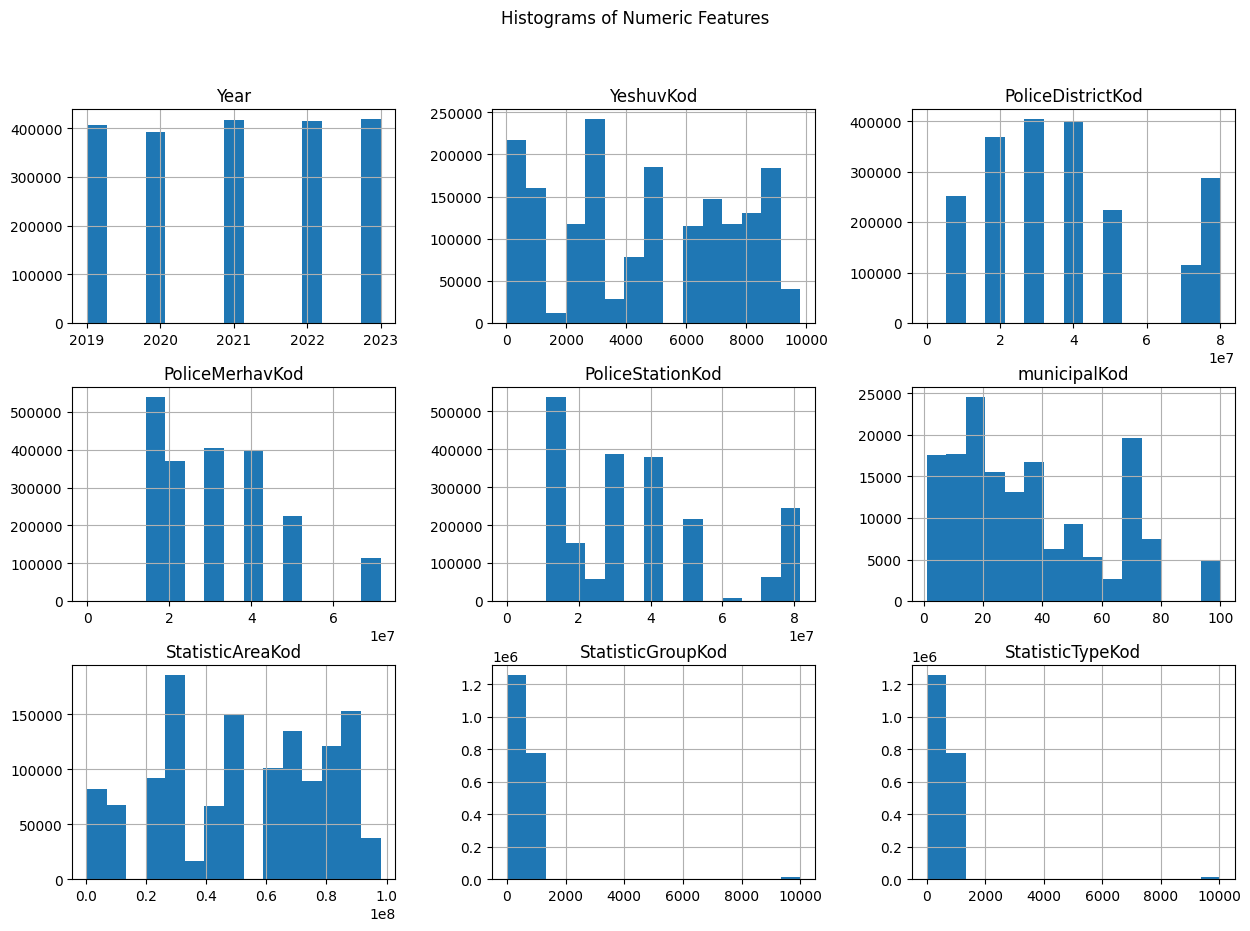

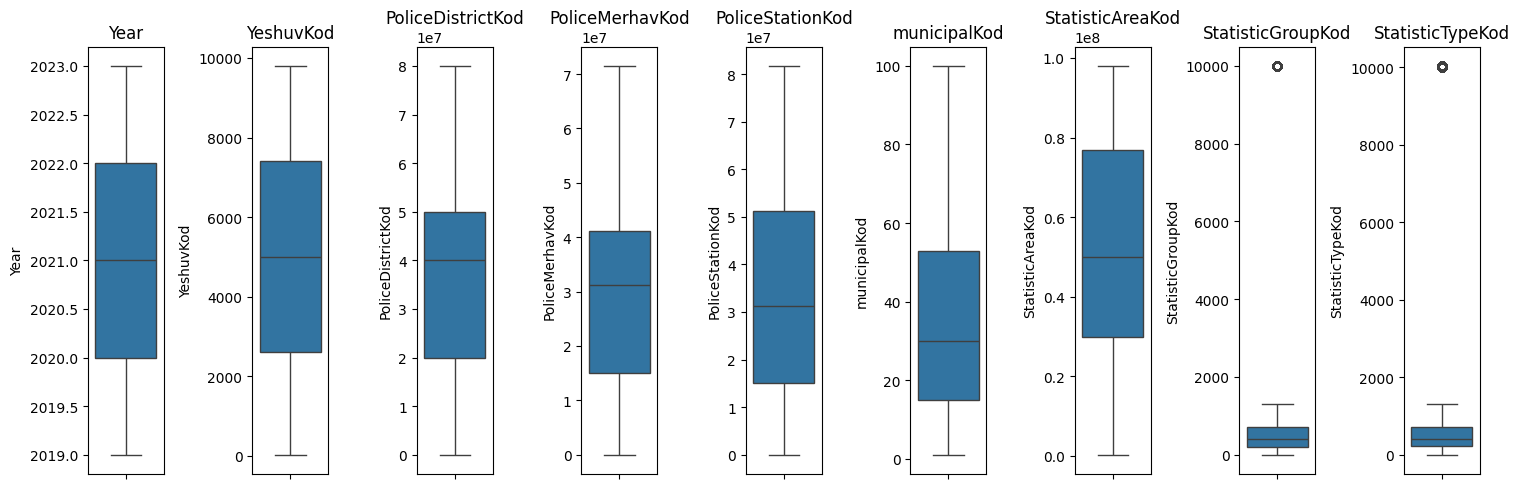

In [14]:
# התפלגות משתנים מספריים
numeric_features = combined_data.select_dtypes(include=['int64', 'float64']).columns

# יצירת היסטוגרמות
combined_data[numeric_features].hist(bins=15, figsize=(15, 10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# זיהוי חריגים עם Boxplot
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_features):
    plt.subplot(1, len(numeric_features), i + 1)
    sns.boxplot(y=combined_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [43]:
# זיהוי קטגוריות נדירות עבור StatisticGroup
rare_statistic_group = combined_data['StatisticGroup'].value_counts()
rare_statistic_group = rare_statistic_group[rare_statistic_group < 10]  # פחות מ-10 שורות

print("Rare categories in StatisticGroup:\n", rare_statistic_group)

Rare categories in StatisticGroup:
 Series([], Name: count, dtype: int64)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-freefont-ttf is already the newest version (20120503-10build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


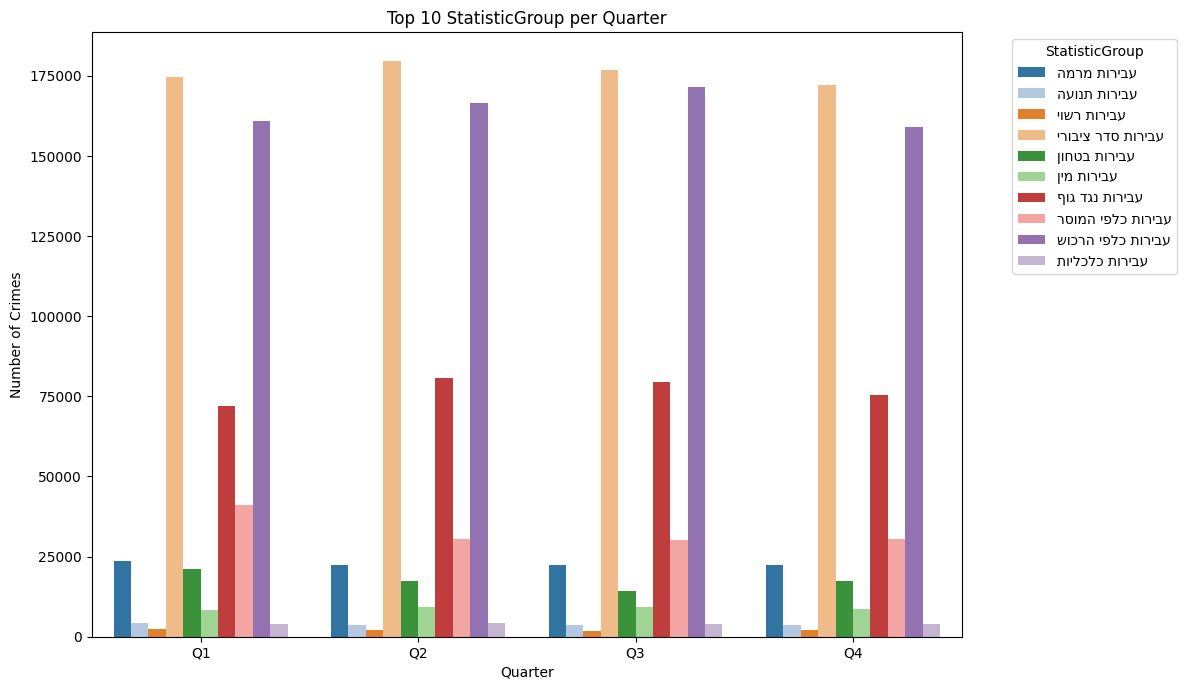

In [71]:
# התקנת פונט עברי בגוגל קולאב
!apt-get install -y fonts-freefont-ttf

# Reverse Hebrew text for the 'StatisticType' column
def reverse_hebrew_text(text):
    return text[::-1] if isinstance(text, str) else text  # Reverse strings only

# Find the top N StatisticType categories by count
top_N = 10  # Adjust N as needed
top_types = combined_data['StatisticGroup'].value_counts().head(top_N).index

# Filter the DataFrame to include only these top categories
filtered_df = combined_data[combined_data['StatisticGroup'].isin(top_types)].copy()

# Apply the reverse function only to the 'StatisticType' column
filtered_df['StatisticGroup'] = filtered_df['StatisticGroup'].apply(reverse_hebrew_text)

# Group data by quarter and StatisticType
crime_grouped = filtered_df.groupby(['Quarter', 'StatisticGroup']).size().reset_index(name='count')

# Plot the data
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'

plt.figure(figsize=(12, 7))
sns.barplot(data=crime_grouped, x='Quarter', y='count', hue='StatisticGroup', palette='tab20')

# Add labels and titles
plt.xlabel('Quarter')
plt.ylabel('Number of Crimes')
plt.title(f'Top {top_N} StatisticGroup per Quarter')
plt.legend(title='StatisticGroup', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [44]:
# הסרת שורות עם ערך -1 בעמודת StatisticGroupKod
combined_data = combined_data[combined_data['StatisticGroupKod'] != -1]

In [45]:
# שמירת עמודות החיזוי
statistic_group = combined_data['StatisticGroup']
statistic_group_kod = combined_data['StatisticGroupKod']

# הסרת עמודות החיזוי מהנתונים
features = combined_data.drop(['StatisticGroup', 'StatisticGroupKod'], axis=1)

# חלוקה לסט אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(
    features,
    statistic_group,  # משתמשים רק ב-StatisticGroupKod כעמודת חיזוי
    test_size=0.2,
    random_state=42,
    stratify=statistic_group  # שומר על התפלגות הקטגוריות
)

# שמירת עמודת StatisticGroup (לשימוש אפשרי בעתיד)
y_train_text = statistic_group_kod.loc[X_train.index]
y_test_text = statistic_group_kod.loc[X_test.index]

In [48]:
def Preprocessing(datasets, train_mappings=None, scaler=None, fit_scaler=False):

    # חישוב מיפויים אם אין train_mappings
    if train_mappings is None:
        train_mappings = {
            'StatisticArea': datasets.dropna(subset=['StatisticArea']).set_index('StatisticAreaKod')['StatisticArea'].to_dict(),
            'Yeshuv': datasets.dropna(subset=['Yeshuv']).set_index('YeshuvKod')['Yeshuv'].to_dict()}

    # שימוש במיפויים למילוי ערכים חסרים
    datasets['StatisticArea'] = datasets['StatisticArea'].fillna(datasets['StatisticAreaKod'].map(train_mappings['StatisticArea']))
    datasets['Yeshuv'] = datasets['Yeshuv'].fillna(datasets['YeshuvKod'].map(train_mappings['Yeshuv']))

    # מחיקת שורות עם ערכים חסרים ב"יישוב"
    datasets = datasets.dropna(subset=['Yeshuv'])

    #We will remove the columns "municipalKod" and "municipalName" because more than 85% of the data are missing values.
    columns_to_remove_85 = ['municipalKod', 'municipalName']
    datasets = datasets.drop(columns=columns_to_remove_85, errors='ignore')

    #We will remove StatisticTypeKod and 'StatisticType' because our target column is 'StatisticGroup" and 'StatisticType' belongs to 'StatisticGroup'.
    datasets = datasets.drop(columns=['StatisticTypeKod', 'StatisticType'], errors='ignore')

    #We attempted to fill the missing values in "StatisticArea" and "Yeshuv" using mappings, but this approach did not resolve the missing data.
    #Since the missing values in "StatisticArea" and "Yeshuv" could not be filled using their respective codes,
    #we decided to remove the columns "YeshuvKod" and "StatisticAreaKod" as they are no longer useful.
    columns_to_remove_after_fill = ['StatisticAreaKod', 'YeshuvKod']
    datasets = datasets.drop(columns=columns_to_remove_after_fill, errors='ignore')

    #We filled the missing values in each dataset's "StatisticArea" column by mapping the most common "StatisticArea" within each "PoliceDistrict".
    #Additionally, we added an indicator column, "is_missing_StatisticArea", to track rows where data was originally missing.

    datasets['is_missing_StatisticArea'] = datasets['StatisticArea'].isnull().astype(int)
    statistic_area_map = datasets.groupby('PoliceDistrict')['StatisticArea'].agg(
        lambda x: x.mode().iloc[0] if not x.mode().empty else None).to_dict()
    datasets['StatisticArea'] = datasets['StatisticArea'].fillna(datasets['PoliceDistrict'].map(statistic_area_map))

    #We removed the columns "PoliceMerhavKod", "PoliceDistrictKod", and "PoliceStationKod" because they are either redundant, irrelevant to the analysis.
    columns_to_remove_redundant = ['PoliceMerhavKod', 'PoliceDistrictKod', 'PoliceStationKod', 'PoliceMerhav', 'PoliceDistrict', 'StatisticArea']
    datasets = datasets.drop(columns=columns_to_remove_redundant, errors='ignore')

    #We checked for duplicates using the 'FictiveIDNumber' column, which uniquely identifies complaints. We noticed some complaints sharing the same 'FictiveIDNumber'.
    #However, upon closer inspection, we found that these rows represent the same complainant reporting multiple charges in the StatisticGroup.
    #To handle this, we can apply one-hot encoding to the StatisticGroup column, allowing each charge to be represented as a separate feature.

    #Encoding the Data
    categorical_columns = ['Yeshuv', 'PoliceStation']
    data_encoded = pd.get_dummies(datasets, columns=categorical_columns, drop_first=True)

    #Removing the duplicaite rows
    data_encoded = data_encoded.drop_duplicates()

    #Feature Engineering
    data_encoded['Quarter_numeric'] = data_encoded['Quarter'].str.extract('(\d)').astype(int)
    data_encoded['Quarter_sin'] = np.sin(2 * np.pi * data_encoded['Quarter_numeric'] / 4)
    data_encoded['Quarter_cos'] = np.cos(2 * np.pi * data_encoded['Quarter_numeric'] / 4)

    data_encoded['YeshuvCrimeRate'] = datasets.groupby('Yeshuv')['Yeshuv'].transform('count')
    data_encoded['CrimeTrend'] = data_encoded.groupby('Year')['Year'].transform('count')

    # נרמול ערכים מספריים
    numeric_columns = ['YeshuvCrimeRate', 'CrimeTrend']
    if scaler is None:
        scaler = MinMaxScaler()
    if fit_scaler:
        data_encoded[numeric_columns] = scaler.fit_transform(data_encoded[numeric_columns])
    else:
        data_encoded[numeric_columns] = scaler.transform(data_encoded[numeric_columns])

    #Now we can remove the ID column
    data_encoded = data_encoded.drop(columns=['FictiveIDNumber','Quarter'], errors='ignore')

    return data_encoded, train_mappings, scaler

In [49]:
# ניקוי סט האימון ויצירת מיפויים
# X_train_cleaned, train_mappings = Preprocessing(X_train)
X_train_cleaned, train_mappings, scaler = Preprocessing(X_train, fit_scaler=True)

# ניקוי סט הבדיקה תוך שימוש במיפויים שנוצרו בסט האימון
# X_test_cleaned, _ = Preprocessing(X_test, train_mappings=train_mappings)
X_test_cleaned, _, _ = Preprocessing(X_test, train_mappings=train_mappings, scaler=scaler)

In [53]:
# עמודות חסרות ב-X_test_cleaned
missing_in_test = set(X_train_cleaned.columns) - set(X_test_cleaned.columns)
print("Missing in X_test_cleaned:", missing_in_test)

# עמודות נוספות ב-X_test_cleaned
extra_in_test = set(X_test_cleaned.columns) - set(X_train_cleaned.columns)
print("Extra in X_test_cleaned:", extra_in_test)


Missing in X_test_cleaned: {"Yeshuv_תעשיון שח''ק", 'Yeshuv_מרכז אזורי מרום הגליל'}
Extra in X_test_cleaned: {'Yeshuv_מפעלי אבשלום'}


In [56]:
# רשימת העמודות החסרות
missing_columns = ["Yeshuv_תעשיון שח''ק", 'Yeshuv_מרכז אזורי מרום הגליל']

# ספירת השורות שבהן הערך הוא 1 עבור כל עמודה חסרה
missing_counts = X_train_cleaned[missing_columns].sum()
print("Number of rows with value 1 in missing columns:\n", missing_counts)


Number of rows with value 1 in missing columns:
 Yeshuv_תעשיון שח''ק             1
Yeshuv_מרכז אזורי מרום הגליל    6
dtype: int64


In [57]:
# רשימת העמודות החסרות
missing_columns = ["Yeshuv_מפעלי אבשלום"]

# ספירת השורות שבהן הערך הוא 1 עבור כל עמודה חסרה
missing_counts = X_test_cleaned[missing_columns].sum()
print("Number of rows with value 1 in missing columns:\n", missing_counts)


Number of rows with value 1 in missing columns:
 Yeshuv_מפעלי אבשלום    1
dtype: int64


In [58]:
#כיוון שמדובר במספר שורות מאוד קטן, הוא לא ישפיע לנו על הנתונים-בחרנו להוריד את השורות האלה מהדאטא
# רשימת עמודות להסרה
columns_to_drop = ["Yeshuv_תעשיון שח''ק", 'Yeshuv_מרכז אזורי מרום הגליל', 'Yeshuv_מפעלי אבשלום']

# הסרת העמודות משני הסטים
X_train_cleaned = X_train_cleaned.drop(columns=columns_to_drop, errors='ignore')
X_test_cleaned = X_test_cleaned.drop(columns=columns_to_drop, errors='ignore')


In [59]:
# נתונים לעבודה
X_train = X_train_cleaned
X_test = X_test_cleaned


In [60]:
# התאמת אינדקסים
y_train = y_train.loc[X_train_cleaned.index]
y_test = y_test.loc[X_test_cleaned.index]

In [63]:
X_test

,Year,is_missing_StatisticArea,Yeshuv_אבו סנאן,Yeshuv_אבן יהודה,Yeshuv_אולפני נווה אילן,Yeshuv_אום אל-פחם,Yeshuv_אופקים,Yeshuv_אור יהודה,Yeshuv_אור עקיבא,Yeshuv_אורון,...,PoliceStation_תחנת שפרעם גליל צפון,PoliceStation_תחנת שרת מרחב איילון החדש,PoliceStation_תחנת תא צפון ירקון,PoliceStation_תחנת תבור צפון,PoliceStation_תחנת תל אביב דרום איילון החדש,Quarter_numeric,Quarter_sin,Quarter_cos,YeshuvCrimeRate,CrimeTrend
1416768,2022,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,2,1.224647e-16,-1.000000e+00,0.012205,-11.189703
1401788,2022,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,2,1.224647e-16,-1.000000e+00,0.006187,-11.189703
278106,2020,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,2,1.224647e-16,-1.000000e+00,0.119252,-11.399286
583528,2021,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,4,-2.449294e-16,1.000000e+00,0.010458,-11.197080
674406,2021,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,4,-2.449294e-16,1.000000e+00,0.049495,-11.197080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483693,2022,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,2,1.224647e-16,-1.000000e+00,0.006187,-11.189703
2018802,2019,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,2,1.224647e-16,-1.000000e+00,0.022764,-11.223094
501931,2021,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,3,-1.000000e+00,-1.836970e-16,0.007125,-11.197080
1976200,2019,0,False,False,False,False,False,False,False,False,...,False,False,False,False,True,4,-2.449294e-16,1.000000e+00,0.248367,-11.223094


In [ ]:
# # Introducing pipeline
# from sklearn.pipeline import Pipeline
# from sklearn.feature_selection import SelectKBest, chi2
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# pipeline = Pipeline([
#     ('feature_selection', SelectKBest(score_func=chi2, k=500)),
#     ('classifier', LogisticRegression(max_iter=1000, random_state=42, solver='saga'))
# ])

# # Training pipeline
# pipeline.fit(X_train_cleaned, y_train)

# # Predicting on test data
# y_pred = pipeline.predict(X_test_cleaned)

# # Evaluating pipeline performance
# print("Pipeline - Classification Report:")
# print(classification_report(y_test, y_pred))

# # Accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.named_steps['classifier'].classes_)
# disp.plot()

## Models

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# # יצירת המודל
# log_reg = LogisticRegression(max_iter=1000, random_state=42, solver='saga')

# # אימון המודל
# log_reg.fit(X_train, y_train)

# # תחזית על סט הבדיקה
# y_pred = log_reg.predict(X_test)

# # הערכת ביצועים
# print("Logistic Regression - Classification Report:")
# print(classification_report(y_test, y_pred))

# # דיוק
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")

# # מטריצת בלבול
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
# disp.plot()

*****

In [54]:
from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

In [64]:

model = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    n_jobs=-1,
    random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.39


Confusion Matrix:
 [[    0     0     0     0   156     0     0     0     0     0   193     0
      0     0]
 [    0   398     0     0   452     0     0     0     0     0  5541     0
      0     0]
 [    0     0     0     0  1160     0     0     0     0     0  1412     0
      0     0]
 [    0     3     0     0  7858     0     0     0     0     0 13445     0
      0     0]
 [    0     4     0     0 55275     0     0     0     0     0 54816     0
      0     0]
 [    0    29     0     0  1480     0     0     0     0     0  4475     0
      0     0]
 [    0     0     0     0    28     0     0     0     0     0    70     0
      0     0]
 [    0     2     0     0  6660     0     0     0     0     0  8747     0
      0     0]
 [    0     0     0     0   122     0     0     0     0     0   387     0
      0     0]
 [    0    37     0     0 18557     0     0     0     0     0 32883     0
      0     0]
 [    0    52     0     0 39063     0     0     0     0     0 73585     0
      0     0]
 [